<a href="https://colab.research.google.com/github/iruamfx/DataAnalysis/blob/main/Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear**
# Com SciPy

In [6]:
# Importacao de Bibliotecas
import numpy as np # Vetores e Matrizes
import scipy # Metodos de treinamento de modelo
import matplotlib.pyplot as plt # Construcao de Graficos
from scipy.optimize import curve_fit # Otimizacao e aperfeicoamento da curva por meio do MSE (Mean Squared Error)
# Alternativas ao MSE incluem o MAE (Mean ABSOLUTE error) e Huber Loss.

In [7]:
# Definicao de Variaveis
idade = [18, 25, 57, 45, 26, 64, 37, 40, 24, 33] # Variavel independente
salarioAnual = [15000, 29000, 68000, 52000, 32000, 80000, 41000, 45000, 26000, 33000] # Variavel dependente

xData = np.array(idade)
yData = np.array(salarioAnual)

In [8]:
# Definicao do formato da funcao a ser otimizada
def linearEq(x, a, b):
  return a * x + b

In [9]:
# Parametros iniciais do otimizador de curva:
initParams = np.array([1.0, 1.0]) # A curva comecara com A = 1 e B = 1, e a partir dai o otimizador buscara a curva com menor MSE

In [10]:
otimParams, pcov = curve_fit(linearEq, xData, yData, initParams) # Otimizador
print("otimParams: ", otimParams) # Contem os valores otimizados para a curva
print("paramsCovariance: ", pcov) # Contem a covariancia dos valores encontrados

otimParams:  [ 1320.53256667 -6627.65171673]
paramsCovariance:  [[ 3.40257832e+03 -1.25555141e+05]
 [-1.25555141e+05  5.31788958e+06]]


In [11]:
# Previsao dos dados utilizando o modelo de previsao construido
previsionModel = linearEq(xData, *otimParams)
previsionModel

array([17141.93448327, 26385.66244994, 68642.70458328, 52796.31378328,
       27706.19501661, 77886.43254995, 42232.05324995, 46193.65094995,
       25065.12988328, 36949.92298328])

In [12]:
# Calculo do erro absoluto (AE) entre os dados reais e os dados previstos
AE = previsionModel - yData
AE

array([ 2141.93448327, -2614.33755006,   642.70458328,   796.31378328,
       -4293.80498339, -2113.56745005,  1232.05324995,  1193.65094995,
        -934.87011672,  3949.92298328])

In [13]:
# Calculo do erro quadratico (SE) entre os dados reais e os dados previstos
SE = np.square(AE)
# Calculo do MSE
MSE = np.mean(SE)
MSE

5479238.909036714

In [14]:
# Calculo do Coeficiente de Determinacao
#  Representa quanto o valor de Y (salario) varia em relacao ao X (idade); calculado atraves da variancia do erro pelo y real
Rsquared = 1.0 - (np.var(AE) / np.var(yData))
Rsquared # A variancia de Y esta 98% atrelada a variancia em X

0.9846300347582353

Text(0, 0.5, 'Salario Anual')

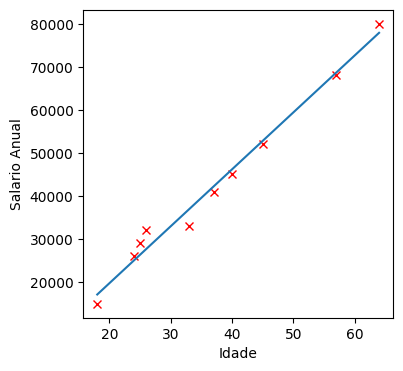

In [15]:
# Plotagem do grafico
f = plt.figure(figsize=(4, 4), dpi=100) # Tamanho da figura
axes = f.add_subplot(111) # Cria os objetos do subplot

# Preenche os pontos no grafico
axes.plot(xData, yData, "rx")

# Instancia os dados para serem utilizados na construcao da linha (representar a equacao de previsao)
xModel = np.linspace(min(xData), max(xData)) # Cria um vetor de entradas X para o modelo linearmente e igualmente espacadas, baseado nos dados X reais // Constante de espacamento: 0.93877551
yModel = linearEq(xModel, *otimParams) # Cria um vetor de saidas Y utilizando o modelo de previsao, e com as entradas X lineares acima

axes.plot(xModel, yModel) #Plot da Linha
plt.xlabel("Idade")
plt.ylabel("Salario Anual")

# Com SKLearn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
linreg = LinearRegression() # Objeto para LinearRegression
xModel = xData.reshape(-1, 1) # Transformando em 2D
reg = linreg.fit(xModel, yData) # Retorna objeto do modelo

In [18]:
# Realiza previsao usando o modelo
prev = reg.predict(xModel)

In [19]:
# Visualizacao dos Parametros:
# Encontrar o MSE por meio do SkLearn
mse = mean_squared_error(yData, prev)
print("MSE:\n", mse)
# Visualizar coeficientes do modelo:
print('Coefs do modelo:\n A: {} ; B: {}'.format(reg.coef_, reg.intercept_))
# Visualizar coeficiente de determinacao
r2 = r2_score(yData, prev)
print("Coef de determinacao:\n", r2)

MSE:
 5479238.909036713
Coefs do modelo:
 A: [1320.53256496] ; B: -6627.651646877632
Coef de determinacao:
 0.9846300347582353


# Regressao aplicada a um modelo real
Mais dados e maior complexidade

In [21]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
data = pd.read_csv("drive/MyDrive/xpe/headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [28]:
# E necessario transformar os valores de tipo dataframe para array
xData = data['Head Size(cm^3)'].values
yData = data['Brain Weight(grams)'].values

In [29]:
# Criacao do modelo
linreg = LinearRegression()
xData = xData.reshape(-1, 1) #1D para 2D
reg = linreg.fit(xData, yData)

In [33]:
# Previsao com o modelo
prev = reg.predict(xData)

In [35]:
# Visualizacao de parametros:
print("Coefs do modelo:\n A: {} ; B: {}".format(reg.coef_, reg.intercept_))
# Calculo do coef de determinacao:
r2 = r2_score(yData, prev)
print("Coef de determinacao:\n", r2)
# 63%: Modelo de Regressao Linear nao e tao satisfatorio, pois o o tamanho da cabeca so explica o peso em 63%, ou seja, ao utilizar o modelo,
# e perdido muito detalhe

# Visualizacao do MSE:
mse = mean_squared_error(yData, prev)
print("MSE:\n", mse)

Coefs do modelo:
 A: [0.26342934] ; B: 325.5734210494426
Coef de determinacao:
 0.639311719957
MSE:
 5201.3840280023305


Text(0, 0.5, 'Brain Weight(grams)')

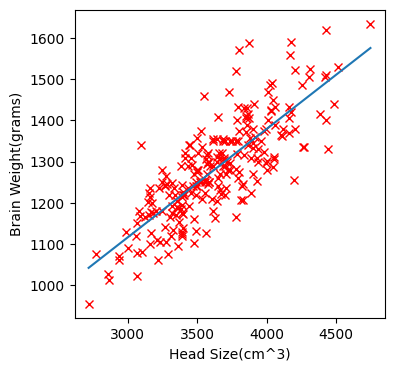

In [34]:
# Plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
axes = plt.subplot(111)
axes.plot(xData, yData, "rx")

xModel = np.linspace(min(xData), max(xData))
yModel = reg.predict(xModel)

axes.plot(xModel, yModel)
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")